<a href="https://colab.research.google.com/github/EPRADDH/NLP-Natural-Language-Processing-Methods/blob/main/Topics_Articles_Classifier_in_Python_with_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset that we will be using for this tutorial is from Kaggle,This data set has about ~125,000 articles and 31 different categories. 

In [ ]:
#Necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

% matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#read dataset
df=pd.read_json("/content/drive/MyDrive/NLP-Natural-Language-Processing-Methods/news_category_dataset.json", lines=True)

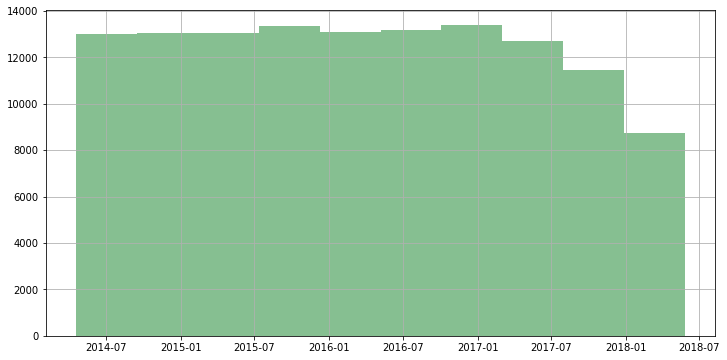

In [ ]:

df.date.hist(figsize=(12,6),color='#86bf91',)

#Category Distribution
Number of categories

In [ ]:
len(set(df['category'].values))

31

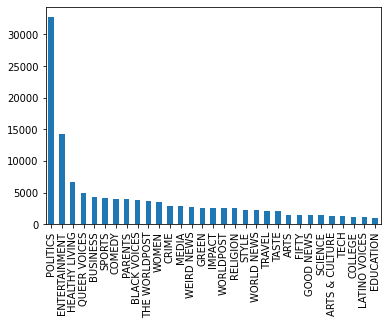

In [ ]:
df['category'].value_counts().plot(kind='bar')

In [ ]:
df.head()

,short_description,headline,date,link,authors,category,tokenized_url
0,She left her husband. He killed their children...,There Were 2 Mass Shootings In Texas Last Week...,2018-05-26,https://www.huffingtonpost.com/entry/texas-ama...,Melissa Jeltsen,CRIME,texas amanda painter mass shooting us 5b081ab4...
1,Of course it has a song.,Will Smith Joins Diplo And Nicky Jam For The 2...,2018-05-26,https://www.huffingtonpost.com/entry/will-smit...,Andy McDonald,ENTERTAINMENT,will smith joins diplo and nicky jam for the o...
2,The actor and his longtime girlfriend Anna Ebe...,Hugh Grant Marries For The First Time At Age 57,2018-05-26,https://www.huffingtonpost.com/entry/hugh-gran...,Ron Dicker,ENTERTAINMENT,hugh grant marries us 5b09212ce4b0568a880b9a8c
3,The actor gives Dems an ass-kicking for not fi...,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,2018-05-26,https://www.huffingtonpost.com/entry/jim-carre...,Ron Dicker,ENTERTAINMENT,jim carrey adam schiff democrats us 5b0950e8e4...
4,"The ""Dietland"" actress said using the bags is ...",Julianna Margulies Uses Donald Trump Poop Bags...,2018-05-26,https://www.huffingtonpost.com/entry/julianna-...,Ron Dicker,ENTERTAINMENT,julianna margulies trump poop bag us 5b093ec2e...


In [ ]:
import re
def tokenize_url(url:str):   
    url=url.replace("https://www.huffingtonpost.com/entry/","")
    url=re.sub("(\W|_)+"," ",url)
    return url

In [ ]:
#create tokenized URL field
df['tokenized_url']=df['link'].apply(lambda x:tokenize_url(x))

In [ ]:
#just the description
df['text_desc'] = df['short_description']

In [ ]:
#description + headline
df['text_desc_headline'] = df['short_description'] + ' '+ df['headline']

In [ ]:
#description + tokenized url
df['text_desc_headline_url'] = df['short_description'] + ' '+ df['headline']+" " + df['tokenized_url']

# Split dataset for training and testing

In [ ]:
# GET A TRAIN TEST SPLIT (set seed for consistent results)
training_data, testing_data = train_test_split(df,random_state = 2000)

# GET LABELS
Y_train=training_data['category'].values
Y_test=testing_data['category'].values

In [ ]:
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
#feature Extraction
def extract_features(df,field,training_data,testing_data,type="binary"):
    """Extract features using different methods"""
    
    logging.info("Extracting features and creating vocabulary...")
    
    if "binary" in type:
        
        # BINARY FEATURE REPRESENTATION
        cv= CountVectorizer(binary=True, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
  
    elif "counts" in type:
        
        # COUNT BASED FEATURE REPRESENTATION
        cv= CountVectorizer(binary=False, max_df=0.95)
        cv.fit_transform(training_data[field].values)
        
        train_feature_set=cv.transform(training_data[field].values)
        test_feature_set=cv.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,cv
    
    else:    
        
        # TF-IDF BASED FEATURE REPRESENTATION
        tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_df=0.95)
        tfidf_vectorizer.fit_transform(training_data[field].values)
        
        train_feature_set=tfidf_vectorizer.transform(training_data[field].values)
        test_feature_set=tfidf_vectorizer.transform(testing_data[field].values)
        
        return train_feature_set,test_feature_set,tfidf_vectorizer

In [ ]:
# GET FEATURES
field="text_desc"
feature_rep="binary"

X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)



2020-12-16 11:07:33,031 : INFO : Extracting features and creating vocabulary...


#Train Logistic Regression model

In [ ]:
logging.info("Training a Logistic Regression Model...")
scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
model=scikit_log_reg.fit(X_train,Y_train)

2020-12-16 11:22:34,184 : INFO : Training a Logistic Regression Model...


[LibLinear]

In [40]:

import numpy as np
def get_top_k_predictions(model,X_test,k):
    
    # get probabilities instead of predicted labels, since we want to collect top 3
    probs = model.predict_proba(X_test)

    # GET TOP K PREDICTIONS BY PROB - note these are just index
    best_n = np.argsort(probs, axis=1)[:,-k:]
    
    # GET CATEGORY OF PREDICTIONS
    preds=[[model.classes_[predicted_cat] for predicted_cat in prediction] for prediction in best_n]
    
    preds=[ item[::-1] for item in preds]
    
    return preds

In [41]:
# GET TOP K PREDICTIONS
top_k = 3
preds=get_top_k_predictions(model,X_test,top_k)

In [42]:
preds

[['POLITICS', 'ENTERTAINMENT', 'HEALTHY LIVING'],
 ['WORLDPOST', 'MEDIA', 'POLITICS'],
 ['PARENTS', 'GREEN', 'EDUCATION'],
 ['HEALTHY LIVING', 'ENTERTAINMENT', 'POLITICS'],
 ['POLITICS', 'GREEN', 'LATINO VOICES'],
 ['RELIGION', 'CRIME', 'POLITICS'],
 ['RELIGION', 'THE WORLDPOST', 'POLITICS'],
 ['SCIENCE', 'POLITICS', 'HEALTHY LIVING'],
 ['WORLD NEWS', 'POLITICS', 'THE WORLDPOST'],
 ['POLITICS', 'WORLDPOST', 'BUSINESS'],
 ['TRAVEL', 'TASTE', 'ENTERTAINMENT'],
 ['CRIME', 'POLITICS', 'BLACK VOICES'],
 ['ENTERTAINMENT', 'POLITICS', 'WOMEN'],
 ['RELIGION', 'POLITICS', 'EDUCATION'],
 ['POLITICS', 'HEALTHY LIVING', 'FIFTY'],
 ['PARENTS', 'ENTERTAINMENT', 'WEIRD NEWS'],
 ['QUEER VOICES', 'POLITICS', 'ARTS & CULTURE'],
 ['POLITICS', 'ENTERTAINMENT', 'HEALTHY LIVING'],
 ['EDUCATION', 'POLITICS', 'BUSINESS'],
 ['CRIME', 'POLITICS', 'SPORTS'],
 ['WEIRD NEWS', 'MEDIA', 'ENTERTAINMENT'],
 ['ENTERTAINMENT', 'QUEER VOICES', 'ARTS'],
 ['POLITICS', 'MEDIA', 'LATINO VOICES'],
 ['POLITICS', 'ENTERTAINMENT

In [43]:
def collect_preds(Y_test,Y_preds):
    """Collect all predictions and ground truth"""
    
    pred_gold_list=[[[Y_test[idx]],pred] for idx,pred in enumerate(Y_preds)]
    return pred_gold_list
             

In [44]:
# GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS
eval_items=collect_preds(Y_test,preds)

In [45]:
eval_items

[[['HEALTHY LIVING'], ['POLITICS', 'ENTERTAINMENT', 'HEALTHY LIVING']],
 [['WORLDPOST'], ['WORLDPOST', 'MEDIA', 'POLITICS']],
 [['GREEN'], ['PARENTS', 'GREEN', 'EDUCATION']],
 [['COMEDY'], ['HEALTHY LIVING', 'ENTERTAINMENT', 'POLITICS']],
 [['POLITICS'], ['POLITICS', 'GREEN', 'LATINO VOICES']],
 [['RELIGION'], ['RELIGION', 'CRIME', 'POLITICS']],
 [['PARENTS'], ['RELIGION', 'THE WORLDPOST', 'POLITICS']],
 [['HEALTHY LIVING'], ['SCIENCE', 'POLITICS', 'HEALTHY LIVING']],
 [['WORLD NEWS'], ['WORLD NEWS', 'POLITICS', 'THE WORLDPOST']],
 [['RELIGION'], ['POLITICS', 'WORLDPOST', 'BUSINESS']],
 [['FIFTY'], ['TRAVEL', 'TASTE', 'ENTERTAINMENT']],
 [['POLITICS'], ['CRIME', 'POLITICS', 'BLACK VOICES']],
 [['POLITICS'], ['ENTERTAINMENT', 'POLITICS', 'WOMEN']],
 [['RELIGION'], ['RELIGION', 'POLITICS', 'EDUCATION']],
 [['POLITICS'], ['POLITICS', 'HEALTHY LIVING', 'FIFTY']],
 [['GOOD NEWS'], ['PARENTS', 'ENTERTAINMENT', 'WEIRD NEWS']],
 [['QUEER VOICES'], ['QUEER VOICES', 'POLITICS', 'ARTS & CULTURE']

In [46]:
def compute_accuracy(eval_items:list):
    correct=0
    total=0
    
    for item in eval_items:
        true_pred=item[0]
        machine_pred=set(item[1])
        
        for cat in true_pred:
            if cat in machine_pred:
                correct+=1
                break
    
    
    accuracy=correct/float(len(eval_items))
    return accuracy

In [47]:
def _reciprocal_rank(true_labels: list, machine_preds: list):
    """Compute the reciprocal rank at cutoff k"""
    
    # add index to list only if machine predicted label exists in true labels
    tp_pos_list = [(idx + 1) for idx, r in enumerate(machine_preds) if r in true_labels]

    rr = 0
    if len(tp_pos_list) > 0:
        # for RR we need position of first correct item
        first_pos_list = tp_pos_list[0]
        
        # rr = 1/rank
        rr = 1 / float(first_pos_list)

    return rr


def compute_mrr_at_k(items:list):
    """Compute the MRR (average RR) at cutoff k"""
    rr_total = 0
    
    for item in items:   
        rr_at_k = _reciprocal_rank(item[0],item[1])
        rr_total = rr_total + rr_at_k
        mrr = rr_total / 1/float(len(items))

    return mrr

In [48]:
# GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
logging.info("Starting evaluation...")
accuracy=compute_accuracy(eval_items)
mrr_at_k=compute_mrr_at_k(eval_items)

2020-12-16 14:43:34,953 : INFO : Starting evaluation...


In [49]:
accuracy

0.5980542754736303

In [50]:
mrr_at_k

0.480526753712253

# Evaluate performance
In this section, we will look at the results for different variations of our model.

In [52]:
def train_model(df,field="text_desc",feature_rep="binary",top_k=3):
    
    logging.info("Starting model training...")
    
    # GET A TRAIN TEST SPLIT (set seed for consistent results)
    training_data, testing_data = train_test_split(df,random_state = 2000,)

    # GET LABELS
    Y_train=training_data['category'].values
    Y_test=testing_data['category'].values
     
    # GET FEATURES
    X_train,X_test,feature_transformer=extract_features(df,field,training_data,testing_data,type=feature_rep)

    # INIT LOGISTIC REGRESSION CLASSIFIER
    logging.info("Training a Logistic Regression Model...")
    scikit_log_reg = LogisticRegression(verbose=1, solver='liblinear',random_state=0, C=5, penalty='l2',max_iter=1000)
    model=scikit_log_reg.fit(X_train,Y_train)

    # GET TOP K PREDICTIONS
    preds=get_top_k_predictions(model,X_test,top_k)
    
    # GET PREDICTED VALUES AND GROUND TRUTH INTO A LIST OF LISTS - for ease of evaluation
    eval_items=collect_preds(Y_test,preds)
    
    # GET EVALUATION NUMBERS ON TEST SET -- HOW DID WE DO?
    logging.info("Starting evaluation...")
    accuracy=compute_accuracy(eval_items)
    mrr_at_k=compute_mrr_at_k(eval_items)
    
    logging.info("Done training and evaluation.")
    
    return model,feature_transformer,accuracy,mrr_at_k

# Train a Single Model

Model - 1 (binary features with description only)

In [53]:
field='text_desc'
feature_rep='binary'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2020-12-16 14:50:50,719 : INFO : Starting model training...
2020-12-16 14:50:50,808 : INFO : Extracting features and creating vocabulary...
2020-12-16 14:50:54,388 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 14:55:29,472 : INFO : Starting evaluation...
2020-12-16 14:55:29,546 : INFO : Done training and evaluation.



Accuracy=0.5980542754736303; MRR=0.480526753712253


You can see that the accuracy is 0.59 and MRR is 0.48.  

This means that only about 59% of the PRIMARY categories are appearing within the top 3 predicted labels. The MRR also tells us that the rank of the PRIMARY category is between position 2 and 3

Model - 2 (tfidf features with description only)

In [54]:
field='text_desc'
feature_rep='tfidf'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2020-12-16 15:01:42,892 : INFO : Starting model training...
2020-12-16 15:01:42,977 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:01:46,727 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 15:03:03,600 : INFO : Starting evaluation...
2020-12-16 15:03:03,681 : INFO : Done training and evaluation.



Accuracy=0.6306323604710702; MRR=0.5108380269670775


Model - 3 (tfidf features with description, headline, url)

In [55]:
field='text_desc_headline_url'
feature_rep='tfidf'
top_k=3

model,transformer,accuracy,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
print("\nAccuracy={0}; MRR={1}".format(accuracy,mrr_at_k))

2020-12-16 15:19:14,239 : INFO : Starting model training...
2020-12-16 15:19:14,323 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:19:21,694 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 15:21:09,521 : INFO : Starting evaluation...
2020-12-16 15:21:09,598 : INFO : Done training and evaluation.



Accuracy=0.8672555043522785; MRR=0.7511574074073957


# Check Predictions on Unseen Articles

In [56]:
test_features=transformer.transform(["George Aref Nader, who was a key witness in special counsel Robert Mueller's Russia investigation, faces new charges of transporting a minor with intent to engage in criminal sexual activity and child pornography"])
get_top_k_predictions(model,test_features,2)

[['POLITICS', 'CRIME']]

In [57]:
test_features=transformer.transform(["True Thompson makes an adorable cameo in Khloe Kardashian's new makeup tutorial video"])
model.predict(test_features)
get_top_k_predictions(model,test_features,2)

[['ENTERTAINMENT', 'STYLE']]

In [58]:
test_features=transformer.transform(["Heidi Klum is apparently the latest celeb to get married and not tell us"])
get_top_k_predictions(model,test_features,2)

[['ENTERTAINMENT', 'STYLE']]

In [59]:
transformer

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.95, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

# Train Different Types of Models

In [60]:
feature_reps=['binary','counts','tfidf']
fields=['text_desc','text_desc_headline','text_desc_headline_url']
top_ks=[3]

results=[]
for field in fields:
    for feature_rep in feature_reps:
        for top_k in top_ks:
            model,transformer,acc,mrr_at_k=train_model(df,field=field,feature_rep=feature_rep,top_k=top_k)
            results.append([field,feature_rep,top_k,acc,mrr_at_k])

2020-12-16 15:41:54,163 : INFO : Starting model training...
2020-12-16 15:41:54,255 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:41:57,788 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 15:46:04,336 : INFO : Starting evaluation...
2020-12-16 15:46:04,411 : INFO : Done training and evaluation.
2020-12-16 15:46:04,447 : INFO : Starting model training...
2020-12-16 15:46:04,522 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:46:08,088 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 15:51:45,413 : INFO : Starting evaluation...
2020-12-16 15:51:45,490 : INFO : Done training and evaluation.
2020-12-16 15:51:45,527 : INFO : Starting model training...
2020-12-16 15:51:45,609 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:51:49,267 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 15:52:59,374 : INFO : Starting evaluation...
2020-12-16 15:52:59,452 : INFO : Done training and evaluation.
2020-12-16 15:52:59,488 : INFO : Starting model training...
2020-12-16 15:52:59,568 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:53:04,981 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 15:57:51,491 : INFO : Starting evaluation...
2020-12-16 15:57:51,566 : INFO : Done training and evaluation.
2020-12-16 15:57:51,601 : INFO : Starting model training...
2020-12-16 15:57:51,681 : INFO : Extracting features and creating vocabulary...
2020-12-16 15:57:56,894 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 16:05:24,849 : INFO : Starting evaluation...
2020-12-16 16:05:24,922 : INFO : Done training and evaluation.
2020-12-16 16:05:24,960 : INFO : Starting model training...
2020-12-16 16:05:25,035 : INFO : Extracting features and creating vocabulary...
2020-12-16 16:05:30,435 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 16:07:01,021 : INFO : Starting evaluation...
2020-12-16 16:07:01,099 : INFO : Done training and evaluation.
2020-12-16 16:07:01,137 : INFO : Starting model training...
2020-12-16 16:07:01,212 : INFO : Extracting features and creating vocabulary...
2020-12-16 16:07:08,287 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 16:12:46,866 : INFO : Starting evaluation...
2020-12-16 16:12:46,941 : INFO : Done training and evaluation.
2020-12-16 16:12:46,977 : INFO : Starting model training...
2020-12-16 16:12:47,055 : INFO : Extracting features and creating vocabulary...
2020-12-16 16:12:54,208 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 16:21:48,140 : INFO : Starting evaluation...
2020-12-16 16:21:48,216 : INFO : Done training and evaluation.
2020-12-16 16:21:48,261 : INFO : Starting model training...
2020-12-16 16:21:48,336 : INFO : Extracting features and creating vocabulary...
2020-12-16 16:21:55,631 : INFO : Training a Logistic Regression Model...


[LibLinear]

2020-12-16 16:23:38,161 : INFO : Starting evaluation...
2020-12-16 16:23:38,237 : INFO : Done training and evaluation.


In [61]:
df_results=pd.DataFrame(results,columns=['text_fields','feature_representation','top_k','accuracy','mrr_at_k'])
df_results.sort_values(by=['text_fields','accuracy'],ascending=False)

,text_fields,feature_representation,top_k,accuracy,mrr_at_k
8,text_desc_headline_url,tfidf,3,0.867256,0.751157
6,text_desc_headline_url,binary,3,0.830069,0.715550
7,text_desc_headline_url,counts,3,0.829717,0.718137
5,text_desc_headline,tfidf,3,0.835925,0.717193
3,text_desc_headline,binary,3,0.794675,0.679179
4,text_desc_headline,counts,3,0.792147,0.677889
2,text_desc,tfidf,3,0.630632,0.510838
0,text_desc,binary,3,0.598054,0.480527
1,text_desc,counts,3,0.595494,0.478452


#Save Model for Future Use

In [63]:
import pickle

model_path="/content/drive/MyDrive/NLP-Natural-Language-Processing-Methods/Topics_Articles Classifier in Python with Logistic Regression/model.pkl"
transformer_path="/content/drive/MyDrive/NLP-Natural-Language-Processing-Methods/Topics_Articles Classifier in Python with Logistic Regression/transformer.pkl"

# we need to save both the transformer -> to encode a document and the model itself to make predictions based on the weight vectors 
pickle.dump(model,open(model_path, 'wb'))
pickle.dump(transformer,open(transformer_path,'wb'))

# Use Loaded Model

In [64]:
loaded_model = pickle.load(open(model_path, 'rb'))
loaded_transformer = pickle.load(open(transformer_path, 'rb'))


test_features=loaded_transformer.transform(["President Trump AND THE impeachment story !!!"])
get_top_k_predictions(loaded_model,test_features,2)

[['POLITICS', 'THE WORLDPOST']]